<a href="https://colab.research.google.com/github/wandb/edu/blob/main/math-for-ml/03_probability/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

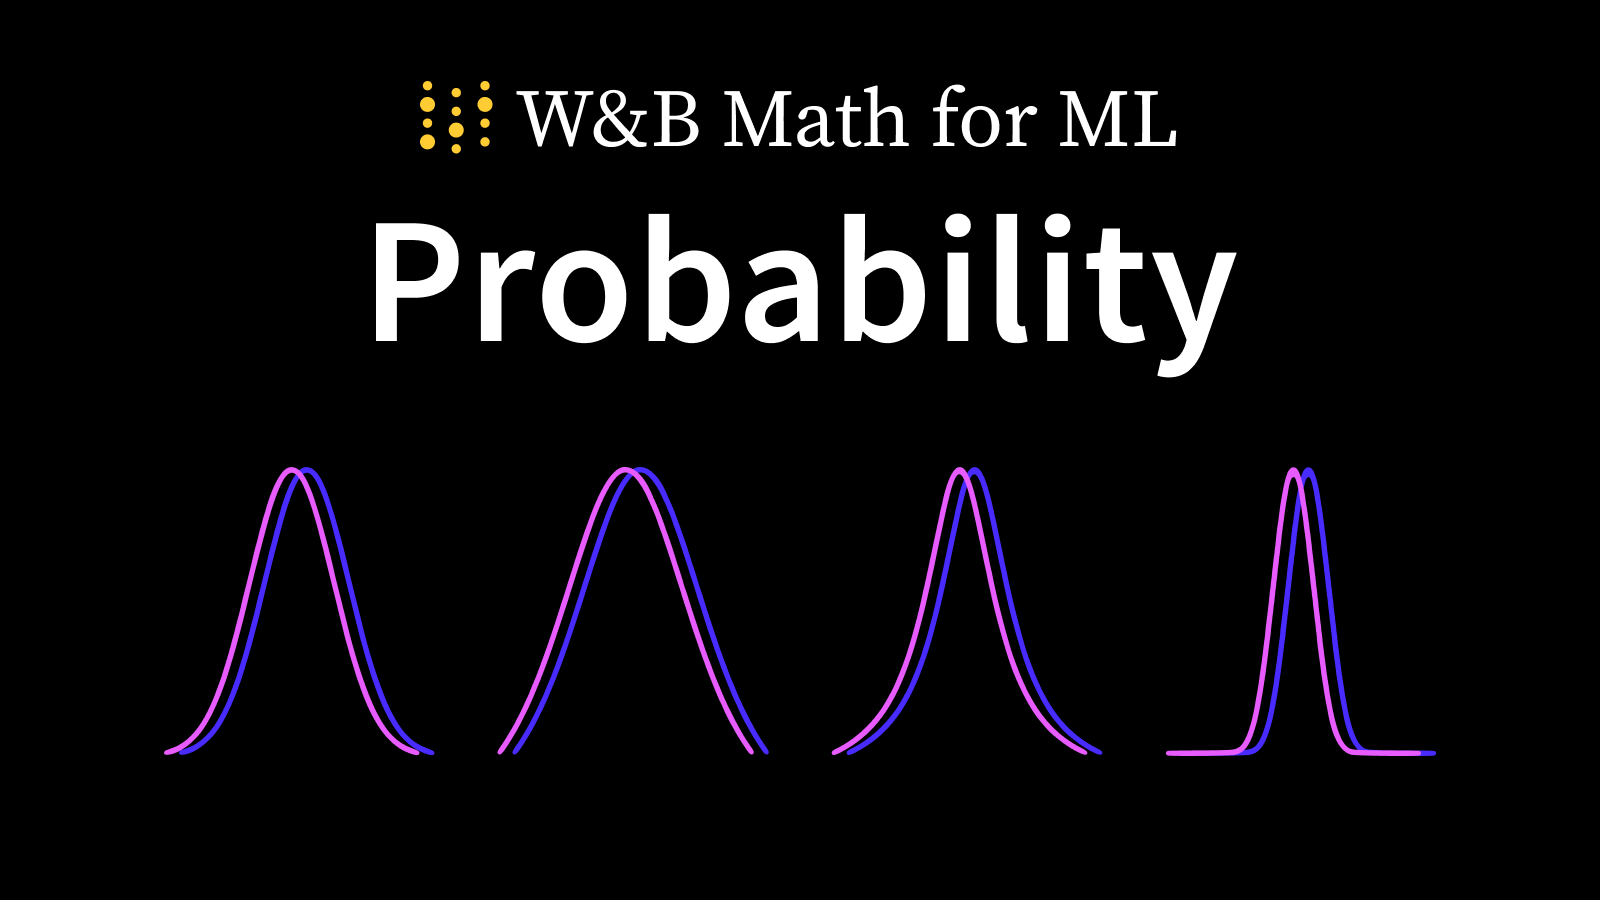

# Setup Code

This section includes setup code for the remaining sections.

In [ ]:
%%capture

if "google.colab" in str(get_ipython()):
    %cd "/content/"
    !git clone "https://github.com/wandb/edu.git"
    %cd "edu/math-for-ml"
    !pip install --upgrade -r requirements-colab.txt
    %cd "03_probability"
else:
    pass

# importing from standard library
import random
import sys
import warnings

warnings.simplefilter("ignore", RuntimeWarning)

# importing libraries
import autograd
import autograd.numpy as np
import scipy.stats as stats
import wandb

if "../" not in sys.path:
    sys.path.append("../")

# importing course-specific modules
import autograder
from utils.util import integrates_to_one

In [ ]:
wandb.login()

In [ ]:
try:
    grader
except NameError:
    grader = autograder.WandbTrackedOK(
        "wandb", "utils/config", "probability", "utils/")

# Representing Probability Distributions

## Probability Mass Functions

If I roll a die, only one of 6 things might happen -- I'll get a number from 1 to 6. One die might be well-made and fair, and so each number will have the same chance of showing up. Another die might be poorly-made, and so there will be some small variations in those chances. Another die might be intentionally made unfair, and so there will be some big variations.

We'd like to be able to describe the differences between these dice with numbers. We do this by defining, for each die, a function that takes in a number between 1 and 6 and spits out the probability that rolling the die will result in that number. We call this the *probability mass function*, or pmf.

Why *mass function*?  Probabilities satisfy two criteria: nothing can have a negative probability, and the probability of either of two things happening is at least as much as one of them happening. These are the same restrictions that we have when we're talking about the masses of objects: nothing can have a negative mass, and the mass of two distinct objects is the sum of their individual masses.

The closest physical analogue to the probability mass function for a (possibly loaded) die is the mass function for a box of six rocks. For each rock, the mass function tells me how much mass it has, a number which cannot be negative. If I add up the masses of all of the rocks, I get the total mass of the collection of rocks. A fair die, one on which all faces have the same chance of landing up, like the ones we normally use for games of chance, would be like a box with six rocks that all weigh the same.

Mathematically, then, probabilities are like masses. We put a lot of "mass" on events that are likely to occur and less "mass" on events that are unlikely. 

One big difference between probability and physical mass is that the "total mass" for a probability mass function is always one.

When working with probability mass functions in ML,
we typically use _arrays_, rather than functions.
This makes it easier to use linear algebra to manipulate our pmfs,
as we'll see in the following sections.
Each index corresponds to a different outcome
(`0` might mean "rolled a 1" or
"this picture contains a dog",
depending on the context).

#### In the cell below, implement a function, `array_is_pmf`, that checks whether an array is a valid `p`robability `m`ass `f`unction.

The restrictions for an array to be a valid probability mass function
are listed in the paragraphs above.

In [ ]:
def array_is_pmf(array):
    """Checks whether an array is a valid probability mass function."""
    return

In [ ]:
grader.grade("q01")

## Probability Density Functions

Probability mass functions are useful, but there are some situations where they're not enough. For example, say I throw a dart at a circular dartboard and ask where it landed. There are so many possible places that the dart could land that it's impossible to list them all, even with infinite time (this is called an *uncountable infinity*). We need to be able to list something in order to define a probability mass function, so we need something new to handle these cases.

We introduce the *probability density function* by analogy to the densities we encounter in the physical world. The density function of an object tells you how its mass is distributed -- where there is more mass per unit volume, the density is higher, and where there is less, the density is lower. We can use density functions to calculate how much mass there is in each and every part of an object.

When the density is the same across the whole object, we can just multiply this constant density value by the volume of the part we're interested in to get the mass. For complicated objects, like humans and laptop computers, the density will be very different at different points. If we want to know how approximately much an object weighs, we need to take a whole bunch of small volumes and add up how much mass is in each of them. The smaller the volumes we take, the more accurate our measurement of the mass will be -- the density can't change too much if the volume is small. Using calculus, we can describe mathematically what happens when our volumes are "infinitely small" and so the mass we calculate will be exactly correct. You may be familiar with this idea, which is called an *integral*.

So, just like the density function is the function we integrate in order to get the mass of any part of an object, a probability density function is the function we integrate in order to get the probability of any group of events out of the possible outcomes. Again, we want the chance that "something happens" to be 1, so we say that the integral of a probability density function is 1.

Also just like regular density, the probability density at a given point can be higher than the total probability. For example, the density of human bone is roughly 2000 kg/m$^3$, but humans weigh much less than 2000 kilograms. Similarly, the density of probability in one region might be more than 1, even though the total amount of probability is always exactly 1.

#### In the cell below, define a probability density function, `my_pdf`, over the numbers between 0 and 1.

The `grader` will check, among other things,
whether your function has total probability of 1
for the range from 0 to 1.

_Note:_ the total probability is the "area under the curve" for `my_pdf`
from 0 to 1.
What are some shapes that you know the area of?
Think simple, like squares, triangles, and circles.

In [ ]:
def my_pdf(x: float) -> float:
    return

In [ ]:
grader.grade("q02")

# Surprises and Machine Learning Loss Functions

As discussed in
[the lecture accompanying this notebook](http://wandb.me/m4ml-video-3),
the "surprise",
or negative log probability,
is often a more useful quantity
than the probability itself
and arises more often in machine learning.

In this section,
we will implement functions to compute the surprise,
along with a number of related quantities,
from the probability mass function,
working our way up from the humble surprise
to quantities,
like the
[Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence),
that define loss functions in ML.

## Surprise

While the probability captures the chance that an event occurs,
the negative log probability, or
"[surprise](https://charlesfrye.github.io/stats/2017/11/09/the-surprise-game.html)",
captures how unexpected an event is --
larger values mean it is more unexpected.

Given the probability mass function (pmf), we can always compute the suprise
by taking the negative logarithm:

$$
\texttt{surprise}(p, i) = -\log(p_i)
$$

#### Implement a function, `surprise`, that takes in an array representing a pmf and an index and returns the value of the associated surprise function.

You don't need to verify whether `p` is a valid pmf.
The [`np.log`](https://numpy.org/doc/stable/reference/generated/numpy.log.html)
function will come in handy here.

In [ ]:
def surprise(p, i):
    """Computes the negative log probability of i under the pmf p."""
    return

In [ ]:
grader.grade("q03")

## Softmax

Many machine learning models produce probability distributions:
- a model that provides a label for an image (e.g. "dog" or "cat") usually
produces a _probability distribution over labels_, and we choose the label with the largest value
- a model that generates sentences usually produces a _probability distribution over the next word in the sentence_, and we sample a new word according to that distribution.

For this process to work,
the outputs of the model need to be a valid probability mass function.

Typically, this is achieved by the `softmax` function,
which takes an array of arbitary numbers
and returns an array that's a valid probability mass function:
all values are non-negative and they sum to 1.

The formula for `softmax` is:

$$
\texttt{softmax}(x)_i = \frac{\mathrm{e}^{x_i}}{\sum_j \mathrm{e}^{x_j}}
$$

#### Implement the `softmax` function in the cell below.

You may want to use function
[`np.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html),
which computes $e^x$ for every element $x$ of its input array.

In [ ]:
def softmax(xs):
    """Computes a 'soft' argmax of the array xs."""
    return

In [ ]:
grader.grade("q04")

## Entropy and Cross-Entropy

The surprise is intimately connected with
a number of ideas from
[information theory](https://charlesfrye.github.io/stats//2016/03/29/info-theory-surprise-entropy.html).

In information theory, the _entropy_
of a random variable is defined,
in terms of its probability mass function,
as:

$$
\texttt{entropy}(p) =
  \sum_{i}
    p_i \cdot -\log(p_i)
$$

This is the same as the _expected value_ of the surprise --
if we were to draw a large number of samples of a random variable
with $p$ as its pmf,
calculate the surprise function on each,
and then take the average,
it would be close to the entropy.

#### Implement a function to compute the `entropy` of a pmf represented by an array.

> _Note:_ The definition of the entropy above involves multiplying a bunch of numbers together and summing up the results. Think back to the [linear algebra section of this course](http://wandb.me/m4ml-linalg-colab) -- can you write this without using a for loop?

In [ ]:
def entropy(p):
    """Computes the entropy of the pmf p."""
    return

In [ ]:
grader.grade("q05")

The entropy tells us the minimum number of bits are required to store
the values of a signal,
no matter how good our compression algorithm is.

It requires us to know the true value of $p$,
which we generally don't have --
what's the probability that the next word after "Hello" is "World"?
or that a certain image will be labeled "dog"?

If we draw samples according to the distribution $p$,
but calculate the surprise using the distribution $q$,
then the average surprise will not be the entropy.
Instead, it will be the _cross-entropy_ --
the entropy from mixing probability and surprise
_across_ distributions,
which is defined as:

$$
\texttt{crossentropy}(p, q) =
  \sum_{i}
    p_i \cdot -\log(q_i)
$$

#### Implement a function to compute the `crossentropy` of `p` on `q`.

> _Note:_ Again, this can be done without a `for` loop.

In [ ]:
def crossentropy(p, q):
    """Computes the cross-entropy of the pmf p onto the pmf q."""
    return

In [ ]:
grader.grade("q06")

## The KL-Divergence

The cross-entropy gives us one way to measure how different
two probability mass functions are --
almost like a notion of distance between two pmfs.

But the distance from a point to itself should be 0,
while `crossentropy(p, p) == entropy(p)`.

So instead of using the cross-entropy,
it is sometimes convenient to use
a different quantity to measure the difference
between two probability distributions,
the `divergence`:

$$
\texttt{divergence}(p, q) =
  \sum_{i}
    p_i \cdot - \log\left(\frac{q_i}{p_i}\right)
$$

But a quick rearrangement of terms (try it!)
indicates that the divergence is just the difference
between the cross-entropy of $p$ on $q$
and the entropy of $p$:

$$
\texttt{divergence}(p, q) = \texttt{crossentropy(p, q)} - \texttt{entropy}(p)
$$

#### Implement a function to compute the `divergence` of `p` on `q`.

You do not need to worry about what happens when entries of `p` or `q` are `0`.

> _Note:_ you might either use the first formula
or the second one, which will allow you to use the functions
you've already implemented.

In [ ]:
def divergence(p, q):
    """Computes the KL-divergence of the pmf p onto the pmf q."""
    return

In [ ]:
grader.grade("q07")

## Machine Learning Loss Functions

These concepts come together in the definition of a typical loss function in machine learning.

Above we noted that ML models often output
probability distributions.
In machine learning, we align our model
with our goals by defining a loss function
that can compare the model's actual outputs
with the desired outputs.

For probability distributions,
the usual choice is the cross entropy
(though KL divergences and entropies also come up in other ML loss functions!).

The desired output is the distribution $p$,
and we compute the cross entropy of $p$
on the model's output $q$ --
`crossentropy(p, q)`.

There's one catch -- in many implementations
(e.g. in [PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) and
[Keras](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)),
the model outputs are not a pmf directly.
Instead, they must be passed through the `softmax` function first.
Before being passed through that function,
the values are known as
[_logits_](https://en.wikipedia.org/wiki/Logit).

#### Implement a function, `softmax_crossentropy` that takes in the `logits` returned by a model and a target pmf `p` and returns the cross entropy loss.

You should reuse your `crossentropy` and `softmax` functions.

> _Note:_ Watch the order of arguments!

In [ ]:
def softmax_crossentropy(logits, p):
    """Applies softmax to logits and computes the cross entropy of p on the result."""
    return

In [ ]:
grader.grade("q08")

# Minimizing the Surprise with Gradient Descent

As the section above describes,
the cross entropy appears directly in one of the most common ML loss functions,
and the cross entropy is the average surprise using the pmf `q`
on samples from the pmf `p`.

But cross entropies and surprises don't always appear
_directly_ in the loss function.
For example, if the variable we are predicting has a pdf instead of a pmf,
then we'd need to work with functions instead of arrays,
which is much tricker.
Even in that case,
the loss function is still usually _derived_ from a surprise.

In this section,
we'll work through the relationship between
the squared error loss function
and the surprise function for a Gaussian,
or normal,
distribution.

## The Gaussian Distribution and its Surprise Function

The Gaussian, or normal, distribution
has the following probability density function:

$$
p\left(x; \mu\right) =
  \frac{1}{\sqrt{Z}}\cdot\mathrm{e}^{-\frac{1}{2}(x - \mu)^2}
$$

where $\mu$ (pronounced "mew") is the mean of the distribution
and $Z = 2 \pi$.
This constant ensures that the distribution integrates to 1.

Gaussian distributions have a number of fabulous properties,
which you can read more about at the links below:
- they are [maximum entropy distributions](http://www.math.uconn.edu/~kconrad/blurbs/analysis/entropypost.pdf)
- the [sampling distributions](https://charlesfrye.github.io/stats/2017/02/24/statistics-as-pushforward.html) of many statistics (like the sample mean and variance) are Gaussian, thanks to the [Central Limit Theorem](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem)
- they have a [simple but profound interpretation in terms of differential equations](https://charlesfrye.github.io/stats/2017/11/22/gaussian-diff-eq.html)

But the most important property for their appearance in ML
is that the associated surprise function,
given by taking the negative logarithm,
has a particularly nice form:

$$
-\log p\left(x; \mu\right) =
  \frac{1}{2}\left(x - \mu\right)^2
    + \frac{1}{2} \cdot \log\left(Z\right)
$$

#### Implement a function, `gaussian_surprise`, that computes this value for a mean parameter `mu` and an array of sampled values `data`.

Recall, from the lecture associated with this notebook,
that surprises _add together_ across multiple samples,
so the total surprise for an array of samples
is the sum of the individual surprises.

> _Note:_ `numpy` provides a quick shortcut for $\pi$ : `np.pi`.
Also, this function can be implemented without a `for` loop using `np.sum`.

In [ ]:
def gaussian_surprise(mu, data):
    return

In [ ]:
grader.grade("q09")

This function is generally not used as the loss function explicitly --
there's no `gaussian_surprise` in machine learning libraries
like TensorFlow or PyTorch.

Instead,
we focus on the most important term:
the squared difference between the observed values $x$
and the mean parameter $\mu$.

The result is the squared error:

$$
\texttt{sum_squared_error}(x) = \sum_{x_i} \left(x_i - \mu\right)^2
$$

#### Implement the `sum_squared_error` function for mean parameter `mu` and vector of values `data`.

> _Note:_ the `numpy` functions
[`np.sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)
and
[`np.square`](https://numpy.org/doc/stable/reference/generated/numpy.square.html)
may be useful here.

In [ ]:
def sum_squared_error(mu, data):
    return

In [ ]:
grader.grade("q10")

Apart from a factor of $1/2$,
these two functions have the same gradient with respect to `mu`
for any choice of `data`.

That means
we should get the same result from each step
of gradient descent,
provided we scale the learning rate
for the version using the squared error by that factor of 1/2:

In [ ]:
def gd_step(mu_t, data, f, learning_rate=0.1):
    """One step of gradient descent to minimize f, parameterized by mu_t, on data."""
    grad_f = autograd.grad(f)  # by default, takes gradient with respect to first argument
    
    return mu_t - learning_rate * grad_f(mu_t, data)

data = np.random.randn(10)

assert np.isclose(
    gd_step(1., data, gaussian_surprise, learning_rate=0.1),
    gd_step(1., data, sum_squared_error, learning_rate=0.05))

The factor of 1/2 in the gradient doesn't change which value of `mu`
minimizes the function,
so optimizing the `sum_squared_error`
gives the same result as optimizing the `gaussian_surprise`.

#### In the cell below, implement a function `run_gd` that applies `n_steps` of gradient descent with the given `learning_rate` starting at `mu_0` to a function `f`, where the function `f` that takes in a parameter and some `data`.

You may use the function `gd_step` from above.

Your implementation will be checked by confirming
that it gives the same answer when optimizing the `mu` parameter 
for both `gaussian_surprise` and `sum_squared_error`.

In [ ]:
def run_gd(mu_0, data, f, learning_rate=0.1, n_steps=10):
    """Applies gradient descent to a function f, parameterized by mu, on data, for n_steps."""
    return

In [ ]:
grader.grade("q11")